In [2]:
from obspy import read
from obspy.core.util import get_example_file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torchviz import make_dot
from seysmo.models.model_class import CNN
from seysmo.models.train_model import train, evaluate
from seysmo.models.utils import save_model, load_model, count_parameters
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchinfo import summary
from torchmetrics import MeanAbsolutePercentageError

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
in_channels = 1
conv_channels = [16, 32, 64]
conv_kernel_size = 3
pool_kernel_size = 2
fc_layers = [128, 64, 10]
input_shape = (33, 438)
epochs = 1000
batch_size = 32
learning_rate = 0.001
loss_fn = nn.MSELoss()
metric_fn = MeanAbsolutePercentageError().to(device)
model = torch.load('../mlartifacts/444973925508816164/7d6970e45b614327b64f66f0a10c8a62/artifacts/model/data/model.pth')

In [8]:
input_tensor = torch.randn(1, 1, 33, 438).to('cuda')

In [9]:
output = model(input_tensor)

In [10]:
dot = make_dot(output, params=dict(model.named_parameters()))
dot.render('../models/model_architecture', format='png')

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [3]:
X = []
Y = []
for i in range(1,11):
    data = pd.read_csv(f"../data/raw/TXT_10/{i}.txt", delimiter="\t")
    X.append(data["Depth"])
    Y.append(data["Velocity"])

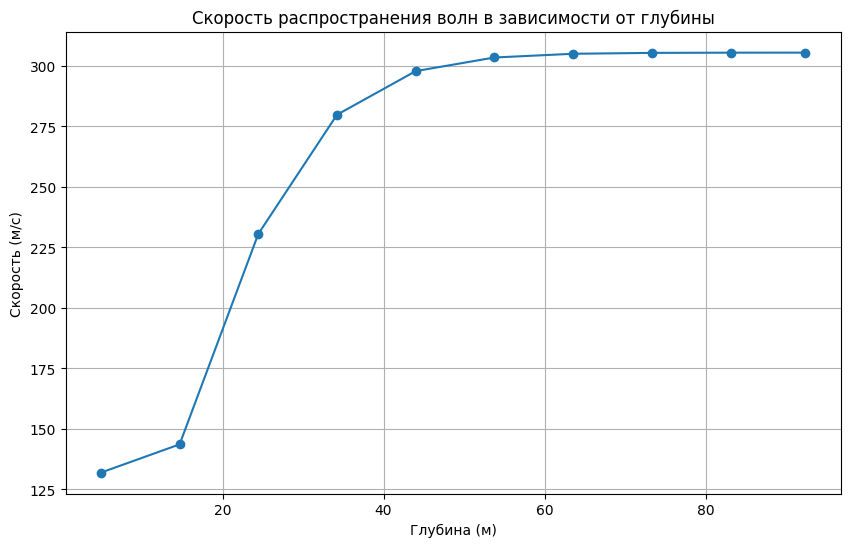

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(X[0], Y[0], marker='o')
plt.xlabel('Глубина (м)')
plt.ylabel('Скорость (м/с)')
plt.title('Скорость распространения волн в зависимости от глубины')
plt.grid(True)
plt.savefig("../reports/figures/deep2speed.png")
plt.show()

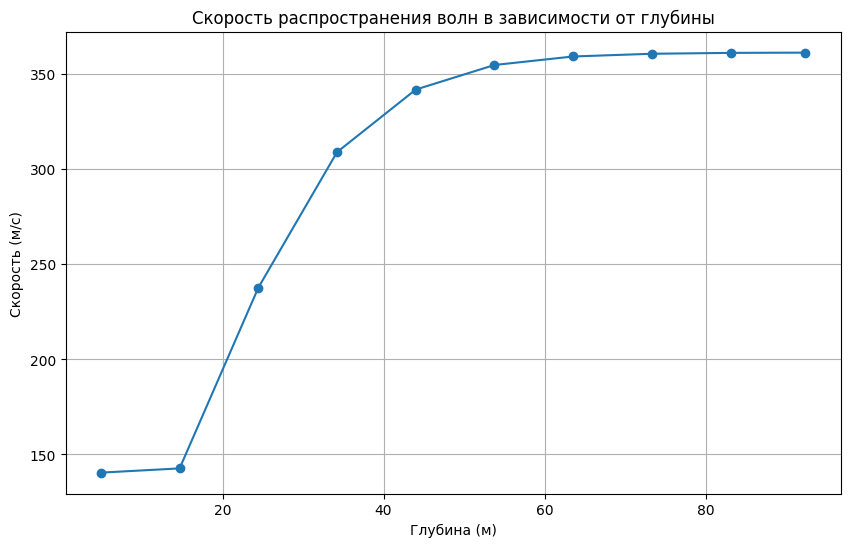

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(X[1], Y[1], marker='o')
plt.xlabel('Глубина (м)')
plt.ylabel('Скорость (м/с)')
plt.title('Скорость распространения волн в зависимости от глубины')
plt.grid(True)
plt.show()

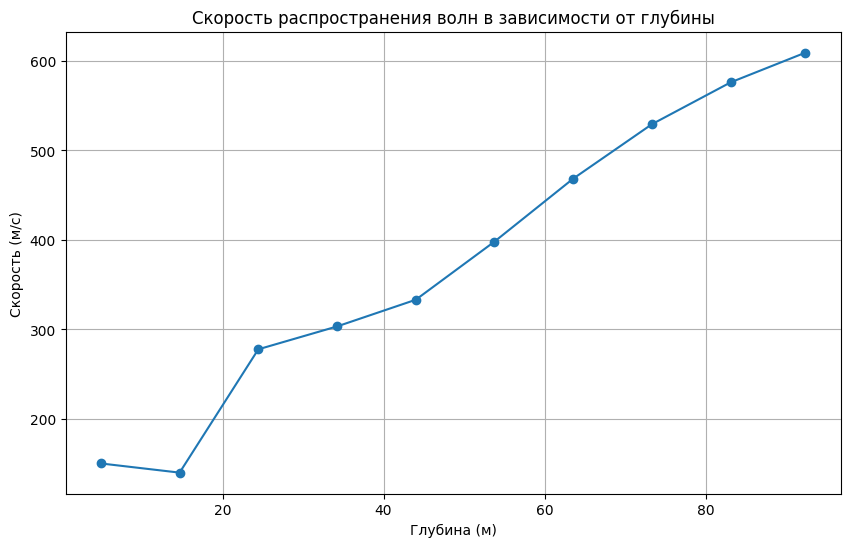

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(X[2], Y[2], marker='o')
plt.xlabel('Глубина (м)')
plt.ylabel('Скорость (м/с)')
plt.title('Скорость распространения волн в зависимости от глубины')
plt.grid(True)
plt.show()

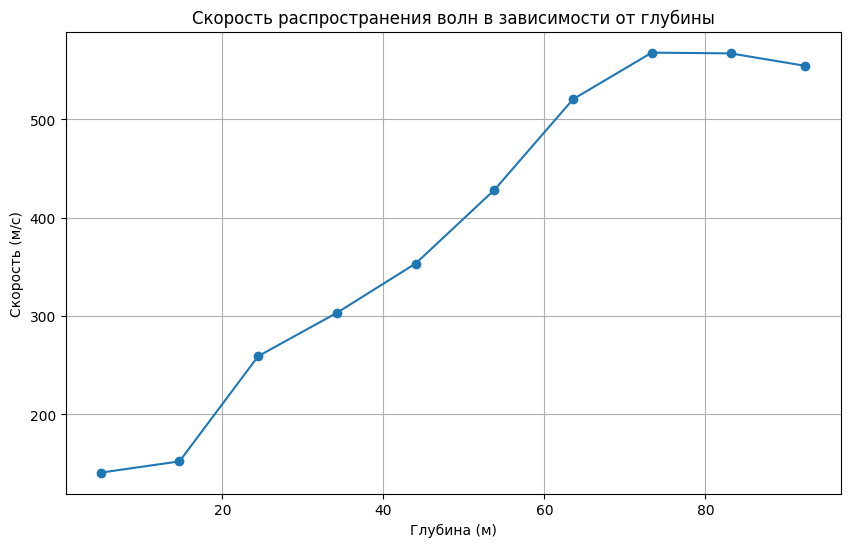

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(X[3], Y[3], marker='o')
plt.xlabel('Глубина (м)')
plt.ylabel('Скорость (м/с)')
plt.title('Скорость распространения волн в зависимости от глубины')
plt.grid(True)
plt.show()

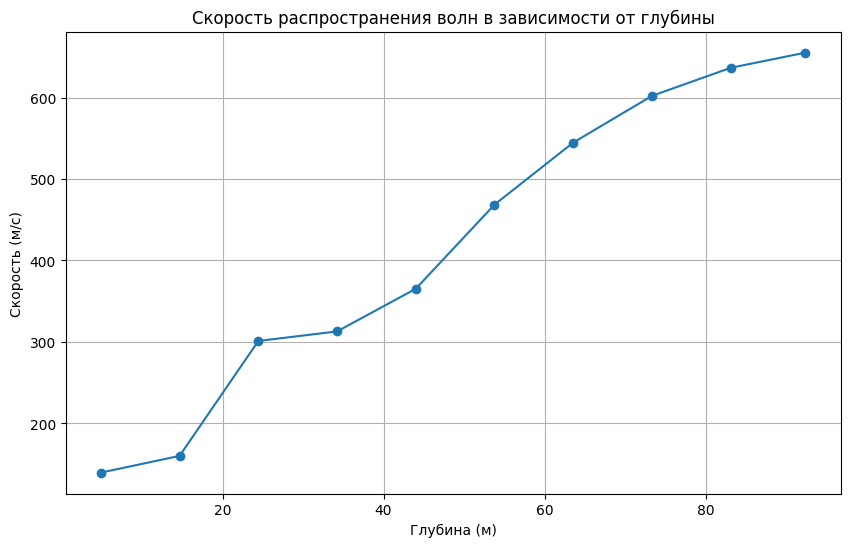

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(X[4], Y[4], marker='o')
plt.xlabel('Глубина (м)')
plt.ylabel('Скорость (м/с)')
plt.title('Скорость распространения волн в зависимости от глубины')
plt.grid(True)
plt.show()

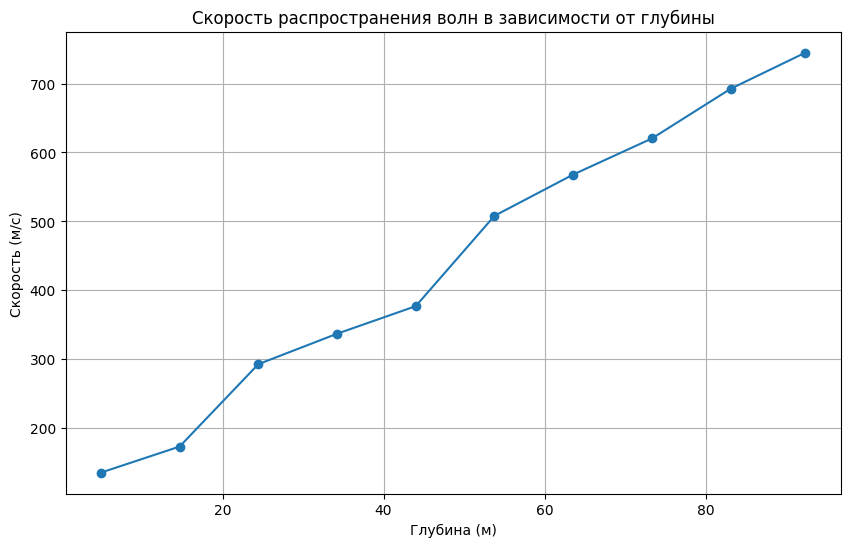

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(X[5], Y[5], marker='o')
plt.xlabel('Глубина (м)')
plt.ylabel('Скорость (м/с)')
plt.title('Скорость распространения волн в зависимости от глубины')
plt.grid(True)
plt.show()

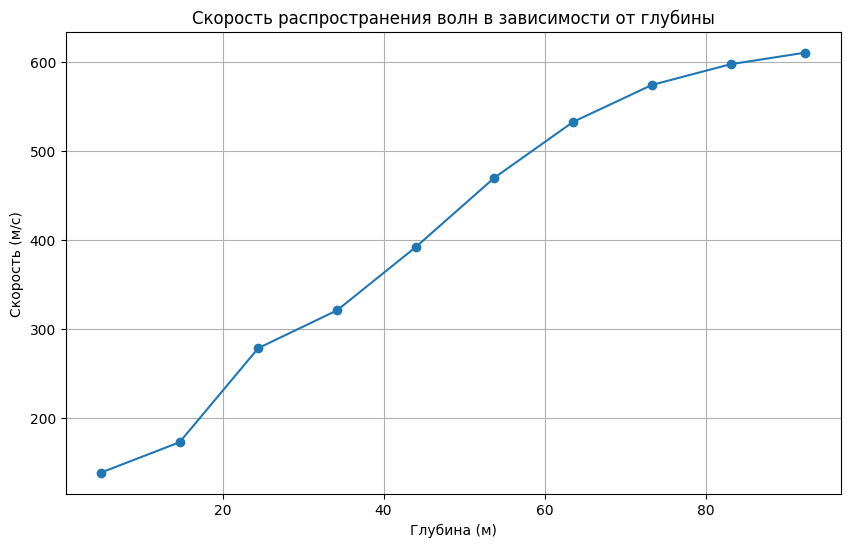

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(X[6], Y[6], marker='o')
plt.xlabel('Глубина (м)')
plt.ylabel('Скорость (м/с)')
plt.title('Скорость распространения волн в зависимости от глубины')
plt.grid(True)
plt.show()

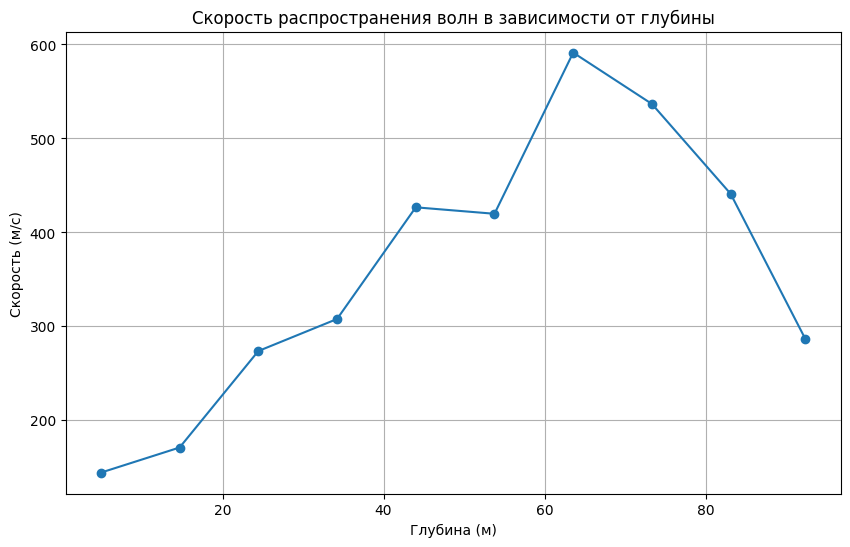

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(X[7], Y[7], marker='o')
plt.xlabel('Глубина (м)')
plt.ylabel('Скорость (м/с)')
plt.title('Скорость распространения волн в зависимости от глубины')
plt.grid(True)
plt.show()

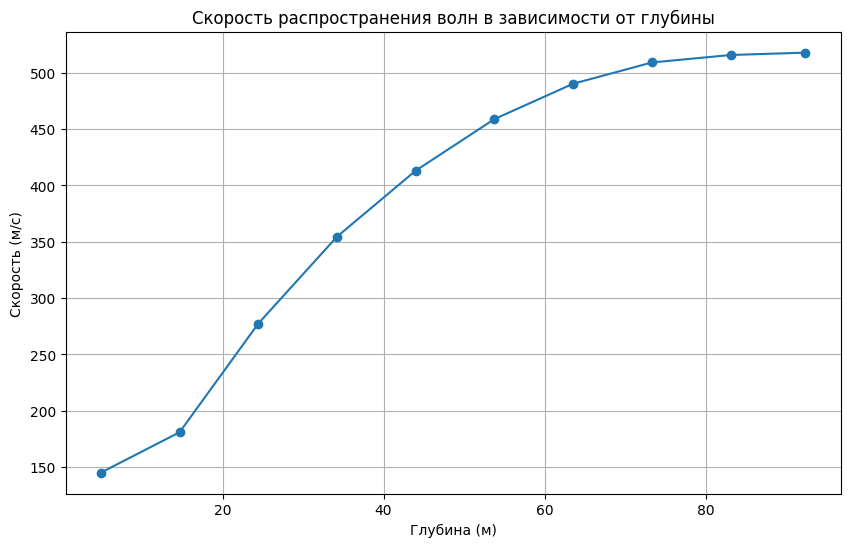

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(X[8], Y[8], marker='o')
plt.xlabel('Глубина (м)')
plt.ylabel('Скорость (м/с)')
plt.title('Скорость распространения волн в зависимости от глубины')
plt.grid(True)
plt.show()

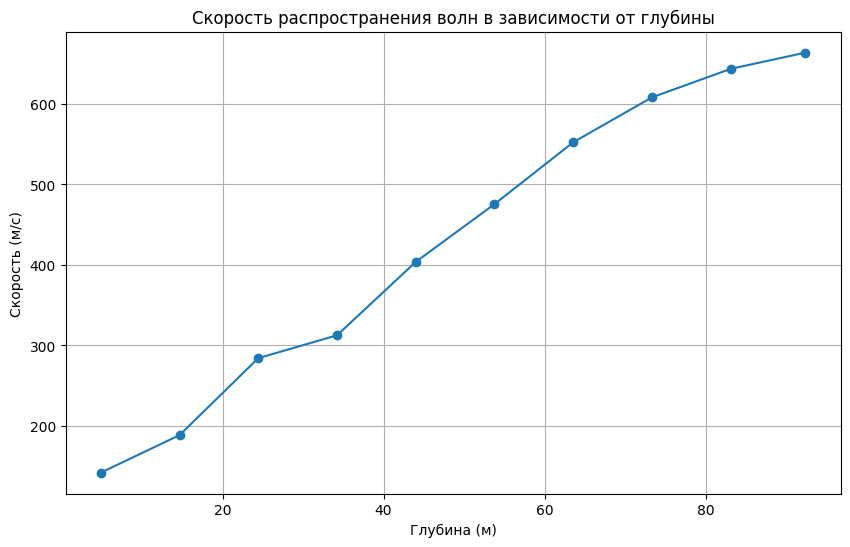

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(X[9], Y[9], marker='o')
plt.xlabel('Глубина (м)')
plt.ylabel('Скорость (м/с)')
plt.title('Скорость распространения волн в зависимости от глубины')
plt.grid(True)
plt.show()

Насколько точны данные? Являются ли сдвиги важными? Важна форма кривой или точные значения на определенных глубинах?
Если достаточно гладкой аппроксимации, тогда для одной сейсмограммы будет достаточно предсказать коэффициенты кривой, а не разбивать данные на разные значения глубин, что способствует предотвращению переобучения.